# Regresión lineal simple
---

***Tenga en cuenta que este script es una guía para ayudar en la resolución de los ejercicios. Las consignas, incisos, datasets, tablas, parámetros y/o demás valores utilizados pueden no coincidir con los de la práctica.***

**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [6]:
MNT_DRIVE_DIR = '/content/drive/'
DRIVE_DIR = '/content/drive/MyDrive/'
DATOS_DIR = DRIVE_DIR + 'Colab Notebooks/DATOS/'
FUENTES_DIR = DRIVE_DIR + 'Colab Notebooks/FUENTES'

from google.colab import drive
drive.mount(MNT_DRIVE_DIR)

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#    Variantes del Descenso del Gradiente
**Descenso del Gradiente por Lotes (Batch Gradient Descent):**

* Calcula el gradiente utilizando todo el conjunto de datos en cada época.
* Ajusta los pesos una vez por época en función del gradiente global promedio.
* Adecuado para conjuntos de datos pequeños o medianos, pero costoso en conjuntos de datos grandes.

**Descenso de Gradiente Estocástico (Stocastic Gradient Descent):**

* Calcula el gradiente utilizando un solo ejemplo a la vez en cada iteración.
* Ajusta los pesos después de cada ejemplo.
* Converge más rápido, especialmente en conjuntos de datos grandes, pero con mayor variabilidad en la dirección del gradiente debido a la estocasticidad.

**Descenso del Gradiente por Mini-lotes (Mini-Batch Gradient Descent):**

* Calcula el gradiente utilizando un mini-lote (un pequeño subconjunto de ejemplos) en cada iteración.
* Ajusta los pesos después de cada mini-lote.
* Equilibra la eficiencia y la estabilidad del gradiente, utilizado comúnmente en prácticas de entrenamiento.

---

**Error Cuadrático Medio  (Mean Square Error)**
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$


Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que intenta predecir el modelo) del ejemplo $i$.
- $\hat{y}_i$ es el valor predicho por el modelo para el ejemplo $i$.




---
Este ejemplo ilustra la relación entre las horas de estudio dedicadas por un grupo de estudiantes y las notas obtenidas en una evaluación (en una escala de 0 a 10). Se busca explorar si existe una correlación positiva entre el tiempo invertido en estudiar y el rendimiento académico. Los datos se grafican en un diagrama de dispersión, y se calcula el coeficiente de correlación de Pearson para cuantificar esta relación. Aunque la tendencia general es que más horas de estudio se asocian con mejores notas, también se incluye cierta variabilidad para reflejar diferencias individuales (como eficiencia de estudio, conocimientos previos, etc.).

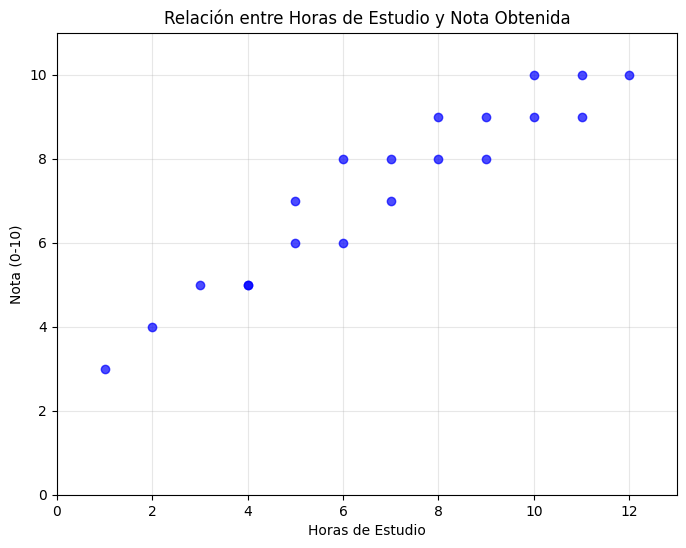

Coeficiente de correlación (Pearson): 0.954


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Nuevos valores para "Horas de Estudio" (entre 1 y 12 horas)
horas_estudio = [1, 2, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 4]

# Notas correspondientes (escala 0-10), con tendencia positiva pero algo de ruido
nota_materia = [3, 4, 5, 5, 6, 7, 6, 8, 7, 8, 8, 9, 8, 9, 9, 10, 9, 10, 10, 5]

X = np.array(horas_estudio)
Y = np.array(nota_materia)

# Gráfica de dispersión
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'o', color='blue', alpha=0.7, markersize=6)
plt.title('Relación entre Horas de Estudio y Nota Obtenida')
plt.xlabel('Horas de Estudio')
plt.ylabel('Nota (0-10)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 13)
plt.ylim(0, 11)
plt.show()

# Cálculo del coeficiente de correlación
correlacion = np.corrcoef(X, Y)[0, 1]
print(f"Coeficiente de correlación (Pearson): {correlacion:.3f}")

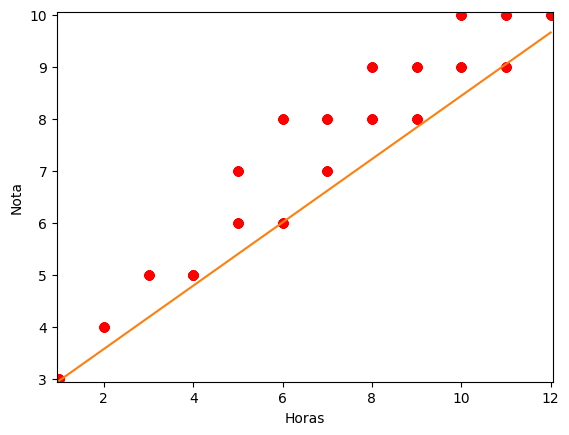

w = 0.6081499022987708
b = 2.361465847308709
Errores:
  0 => 106.955192
  1 => 41.579152
  2 => 40.307942
  3 => 39.098419
  4 => 37.947652
  5 => 36.852847
  6 => 35.811341
  7 => 34.820599
  8 => 33.878201
  9 => 32.981845
 10 => 32.129334
 11 => 31.318578
 12 => 30.547584
 13 => 29.814451
 14 => 29.117371
 15 => 28.454618
 16 => 27.824552
 17 => 27.225605
 18 => 26.656287
 19 => 26.115177
 20 => 25.600921
 21 => 25.112229
 22 => 24.647873
 23 => 24.206681
 24 => 23.787539
 25 => 23.389385
 26 => 23.011205
 27 => 22.652037
 28 => 22.310961
 29 => 21.987103
 30 => 21.679629
 31 => 21.387745
 32 => 21.110696
 33 => 20.847761
 34 => 20.598254
 35 => 20.361522
 36 => 20.136943
 37 => 19.923924
 38 => 19.721900
 39 => 19.530334
 40 => 19.348715
 41 => 19.176555
 42 => 19.013389
 43 => 18.858776
 44 => 18.712295
 45 => 18.573546
 46 => 18.442145
 47 => 18.317732
 48 => 18.199958
 49 => 18.088497
 50 => 17.983033
 51 => 17.883268
Quien dedicó 9 horas de estudio sacará un 7 como nota en el e

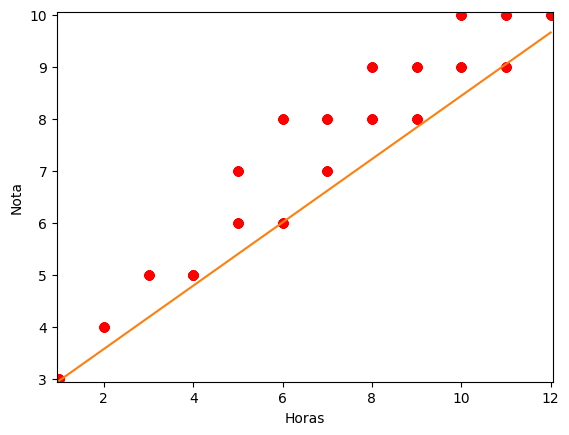

In [14]:
from ClassNeuronaLineal import NeuronaLineal

x_train = X.reshape(-1,1)    # selecciona entradas y formatea a Nx1
y_train = Y.reshape(-1,1)    # selecciona salidas y formatea a Nx1

# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.1, draw=1, title=['Horas', 'Nota'])
modelo = modelo.fit(x_train, y_train)
print('w =', modelo.w_[0])
print('b =', modelo.b_[0])

# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))


dato = 9 # horas de estudio dedicadas
print('Quien dedicó %d horas de estudio sacará un %d como nota en el examen' % (dato, modelo.predict([dato])[0]))   # prediccion

In [9]:
# prueba con pesos de otro entrenamiento
#w = 0.6281767157431366
#b = 3.2010171504435605
modelo.w_ = [0.63]
modelo.b_ = [3.20]

for i in range(1, 12):
    dato = i # horas de estudio dedicadas
    print('Quien dedicó %2d horas de estudio sacará un %2d como nota en el examen' % (dato, modelo.predict([dato])[0]))   # prediccion

Quien dedicó  1 horas de estudio sacará un  3 como nota en el examen
Quien dedicó  2 horas de estudio sacará un  4 como nota en el examen
Quien dedicó  3 horas de estudio sacará un  5 como nota en el examen
Quien dedicó  4 horas de estudio sacará un  5 como nota en el examen
Quien dedicó  5 horas de estudio sacará un  6 como nota en el examen
Quien dedicó  6 horas de estudio sacará un  6 como nota en el examen
Quien dedicó  7 horas de estudio sacará un  7 como nota en el examen
Quien dedicó  8 horas de estudio sacará un  8 como nota en el examen
Quien dedicó  9 horas de estudio sacará un  8 como nota en el examen
Quien dedicó 10 horas de estudio sacará un  9 como nota en el examen
Quien dedicó 11 horas de estudio sacará un 10 como nota en el examen
